In [1]:
import pandas as pd
import numpy as np

## WestRoxBury.csv 파일을 pandas로 불러오기
 - 컬럼설명
- TOTAL VALUE : 주택가격(단위: 1000달러)
- TAX : 세금, 주택가격에 세율을 곱한 값에 근거한 세금계산서 금액(단위: 달러)
- LOT SQFT : 총 부지 면적(단위: 제곱 피트)
- YR BUILT : 건축 연도
- GROSS AREA : 총 바닥면적
- LIVING AREA : 주거 공간 총 면적(단위: 제곱 피트)
- FLOORS : 층 수
- ROOMS : 총 방 수
- BEDROOMS : 총 침실 수
- FULL BATH : 총 욕실 개수
- HALF BATH : 총 보조욕실 개수
- KITCHEN : 총 주방 개수
- FRIREPLACE : 총 벽난로 개수
- REMODEL : 언제 리모델링을 했는지 (최근/오래전/안함)

In [8]:
df = pd.read_csv('/content/drive/MyDrive/데이터마이닝수업/Data/WestRoxbury.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5802 entries, 0 to 5801
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TOTAL VALUE   5802 non-null   float64
 1   TAX           5802 non-null   int64  
 2   LOT SQFT      5802 non-null   int64  
 3   YR BUILT      5802 non-null   int64  
 4   GROSS AREA    5802 non-null   int64  
 5   LIVING AREA   5802 non-null   int64  
 6   FLOORS        5802 non-null   float64
 7   ROOMS         5802 non-null   int64  
 8   BEDROOMS      5802 non-null   int64  
 9   FULL BATH     5802 non-null   int64  
 10  HALF BATH     5802 non-null   int64  
 11  KITCHEN       5802 non-null   int64  
 12  FIREPLACE     5802 non-null   int64  
 13  REMODEL       1456 non-null   object 
dtypes: float64(2), int64(11), object(1)
memory usage: 634.7+ KB


,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,NaN
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,NaN
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,NaN
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,404.8,5092,6762,1938,2594,1714,2.0,9,3,2,1,1,1,Recent
5798,407.9,5131,9408,1950,2414,1333,2.0,6,3,1,1,1,1,NaN
5799,406.5,5113,7198,1987,2480,1674,2.0,7,3,1,1,1,1,NaN
5800,308.7,3883,6890,1946,2000,1000,1.0,5,2,1,0,1,0,NaN


In [9]:
# 컬럼명 확인
df.columns

Index(['TOTAL VALUE ', 'TAX', 'LOT SQFT ', 'YR BUILT', 'GROSS AREA ',
       'LIVING AREA', 'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH',
       'HALF BATH', 'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

In [10]:
new_column_names = {
    'TOTAL VALUE ': 'TOTAL_VALUE',
    'TAX ': 'TAX',
    'LOT SQFT ': 'LOT_SQFT',
    'YR BUILT': 'YR_BUILT',
    'GROSS AREA ': 'GROSS_AREA',
    'LIVING AREA': 'LIVING_AREA',
    'FLOORS ': 'FLOORS',
    'ROOMS ': 'ROOMS',
    'BEDROOMS ': 'BEDROOMS',
    'FULL BATH': 'FULL_BATH',
    'HALF BATH': 'HALF_BATH',
    'KITCHEN ': 'KITCHEN',
    'FIREPLACE ': 'FIREPLACE',
    'REMODEL ': 'REMODEL'
}
df = df.rename(columns=new_column_names)
df.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

# 차원축소
## 1. 차원축소를 위해 요약정보로 데이터값 확인
-- ex) YR_BUILD 건축년도에 대한 데이터 확인

YR_BUILT
1920    566
1950    478
1930    430
1960    356
1925    302
       ... 
1883      1
1976      1
0         1
1874      1
1800      1
Name: count, Length: 149, dtype: int64


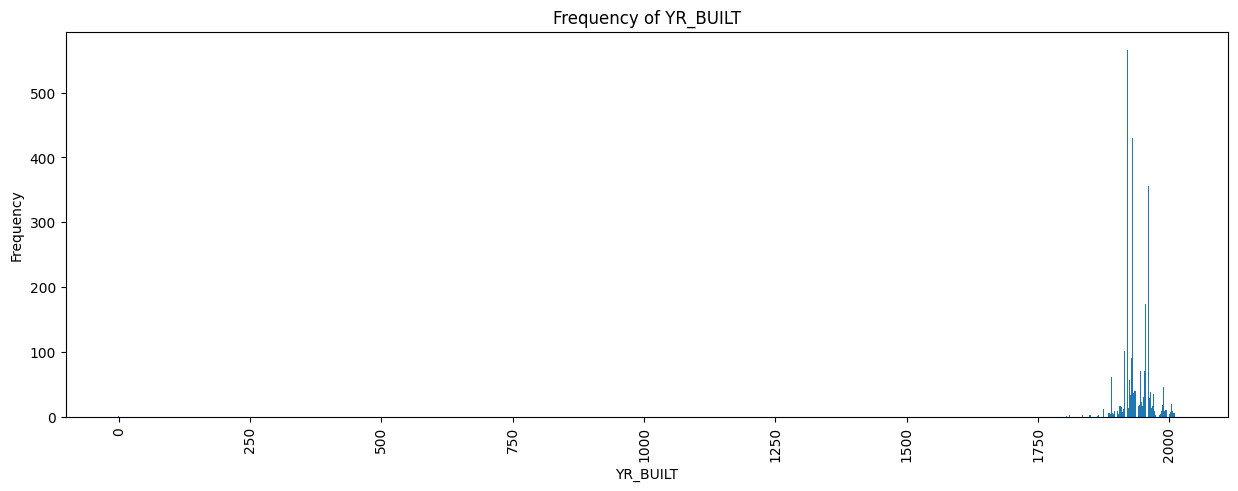

In [11]:
# prompt: YR_BUILD 컬럼에 대해 범주형 형태의 요약정보를 제공하는 코드와 이를 바탕으로 막대그래프를 그릴 수 있는 코드를 제공해주세요

# YR_BUILT 컬럼에 대한 범주형 요약정보 (빈도수)
yr_built_counts = df['YR_BUILT'].value_counts()
print(yr_built_counts)

# 막대그래프 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.bar(yr_built_counts.index, yr_built_counts.values)
plt.xlabel('YR_BUILT')
plt.ylabel('Frequency')
plt.title('Frequency of YR_BUILT')
plt.xticks(rotation=90)
plt.show()


YR_BUILT
0       1
1798    1
1800    1
1804    1
1810    2
       ..
2007    9
2008    5
2009    5
2010    5
2011    6
Name: YR_BUILT, Length: 149, dtype: int64


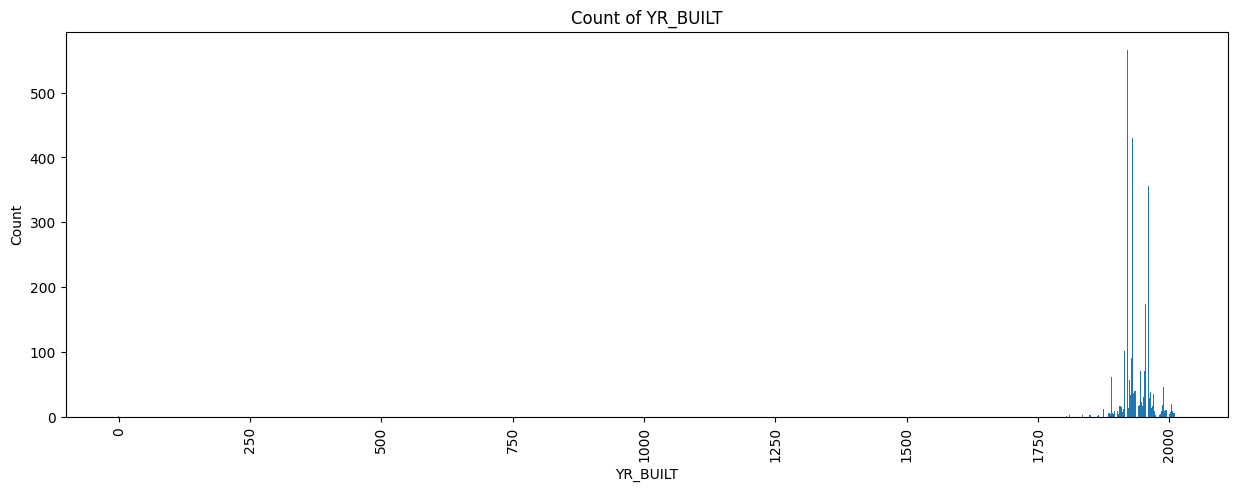

In [12]:
# prompt: YR_BUILD 컬럼에 group by를 통해 년도 순서별로 count를 제공할 수 있는 코드를 제공해주세요

#import matplotlib.pyplot as plt
# YR_BUILT 컬럼으로 그룹화하여 각 년도별 개수를 계산합니다.
yr_built_counts = df.groupby('YR_BUILT')['YR_BUILT'].count()

# 결과를 출력합니다.
print(yr_built_counts)

# 막대그래프로 시각화합니다.
plt.figure(figsize=(15, 5))
plt.bar(yr_built_counts.index, yr_built_counts.values)
plt.xlabel('YR_BUILT')
plt.ylabel('Count')
plt.title('Count of YR_BUILT')
plt.xticks(rotation=90)
plt.show()


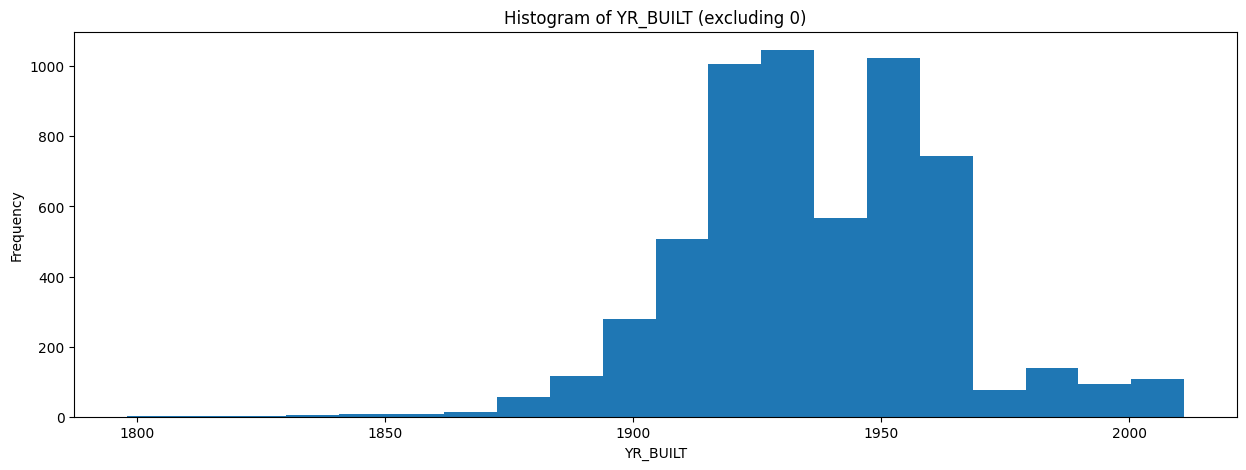

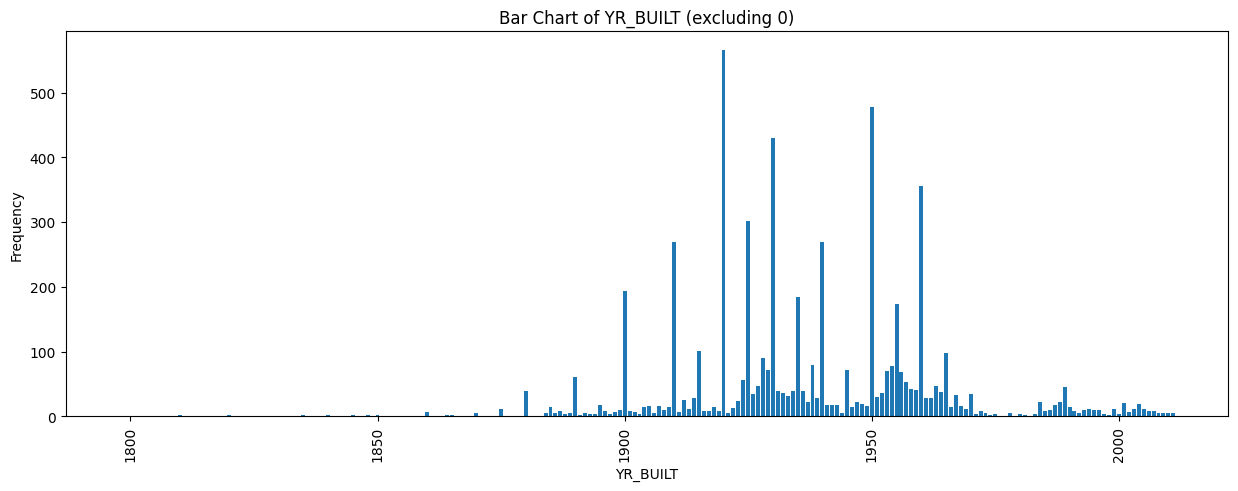

In [14]:
# prompt: YR_BUILD 컬럼값이 0인 것을 제외하고 히스토 그램과 막대 그래프를 이용하여 분포를 파악할 수 있는 코드를 제공해주세요

# import matplotlib.pyplot as plt
# YR_BUILT 컬럼값이 0이 아닌 데이터만 추출
df_filtered = df[df['YR_BUILT'] != 0]

# 히스토그램 그리기
plt.figure(figsize=(15, 5))
plt.hist(df_filtered['YR_BUILT'], bins=20)  # bins를 조절하여 막대 개수 변경 가능
plt.xlabel('YR_BUILT')
plt.ylabel('Frequency')
plt.title('Histogram of YR_BUILT (excluding 0)')
plt.show()

# 막대 그래프 그리기
yr_built_counts = df_filtered['YR_BUILT'].value_counts().sort_index()

plt.figure(figsize=(15, 5))
plt.bar(yr_built_counts.index, yr_built_counts.values)
plt.xlabel('YR_BUILT')
plt.ylabel('Frequency')
plt.title('Bar Chart of YR_BUILT (excluding 0)')
plt.xticks(rotation=90)
plt.show()


## 2. 다수의 범주를 가지고 있는 범주형 변수를 몇개의 범주로 재그룹

In [23]:
# prompt: df_filtered 데이터셋에서 YR_BUILT 변수에 대해 4개의 범주로 분류하여 Ordinal Encoding을 할 수 있도록 하는 코드를 제공해주세요

# import pandas as pd
# import numpy as np
# YR_BUILT 컬럼의 최솟값과 최댓값 확인
min_yr_built = df_filtered['YR_BUILT'].min()
max_yr_built = df_filtered['YR_BUILT'].max()
print(min_yr_built, max_yr_built)

# 4개의 범주로 나누기 위한 구간 계산
bins = np.linspace(min_yr_built, max_yr_built, 5)
print(bins)

# pd.cut 함수를 사용하여 범주화
df_filtered['YR_BUILT_Category'] = pd.cut(df_filtered['YR_BUILT'], bins=bins, labels=['Oldest', 'Older', 'Newer', 'Newest'])
# df_filtered

# Ordinal Encoding을 위한 mapping dictionary 생성
category_mapping = {'Oldest': 1, 'Older': 2, 'Newer': 3, 'Newest': 4}

# mapping dictionary를 사용하여 Ordinal Encoding 수행
df_filtered['YR_BUILT_Encoded'] = df_filtered['YR_BUILT_Category'].map(category_mapping)

# 결과 확인
df_filtered[['YR_BUILT', 'YR_BUILT_Category', 'YR_BUILT_Encoded']].head(20)

1798 2011
[1798.   1851.25 1904.5  1957.75 2011.  ]


<ipython-input-23-db401dc97f28>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['YR_BUILT_Category'] = pd.cut(df_filtered['YR_BUILT'], bins=bins, labels=['Oldest', 'Older', 'Newer', 'Newest'])
<ipython-input-23-db401dc97f28>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['YR_BUILT_Encoded'] = df_filtered['YR_BUILT_Category'].map(category_mapping)


,YR_BUILT,YR_BUILT_Category,YR_BUILT_Encoded
0,1880,Older,2
1,1945,Newer,3
2,1890,Older,2
3,1957,Newer,3
4,1910,Newer,3
5,1950,Newer,3
6,1954,Newer,3
7,1950,Newer,3
8,1958,Newest,4
9,1900,Older,2


## 3. 명목형(nominal)인 범주형 변수를 수치형 변수로 전환(One-Hot Encoding)

- REMODEL 컬럼을 예로

In [25]:
df_filtered['REMODEL'].value_counts(dropna=False)

,count
REMODEL,
NaN,4346
Recent,874
Old,581


In [34]:
# prompt: df_filtered 데이터셋에서 REMODEL 컬럼값에 존재하는 NaN 을 'Unkown' 값으로 대체하는 코드를 제공해주세요

df_filtered['REMODEL'].fillna('Unknown', inplace=True)
df_filtered

<ipython-input-34-5e9ded935094>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['REMODEL'].fillna('Unknown', inplace=True)


,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL,YR_BUILT_Category,YR_BUILT_Encoded
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,Unknown,Older,2
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent,Newer,3
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,Unknown,Older,2
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,Unknown,Newer,3
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,Unknown,Newer,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,404.8,5092,6762,1938,2594,1714,2.0,9,3,2,1,1,1,Recent,Newer,3
5798,407.9,5131,9408,1950,2414,1333,2.0,6,3,1,1,1,1,Unknown,Newer,3
5799,406.5,5113,7198,1987,2480,1674,2.0,7,3,1,1,1,1,Unknown,Newest,4
5800,308.7,3883,6890,1946,2000,1000,1.0,5,2,1,0,1,0,Unknown,Newer,3


In [35]:
# prompt: df_filtered DataFrame 사용: REMODEL 컬럼을 one-hot encoding을 하되 get_dummy 함수를 사용하지 않고 one-hot encoding 함수를 이용하는 코드를 제공해주세요

import pandas as pd

# REMODEL 컬럼의 unique 값 확인
unique_remodel = df_filtered['REMODEL'].unique()

# one-hot encoding 함수 정의
def one_hot_encoding(df, column_name):
    """
    DataFrame의 특정 컬럼을 one-hot encoding합니다.

    Args:
        df: DataFrame
        column_name: one-hot encoding을 적용할 컬럼 이름

    Returns:
        one-hot encoding이 적용된 DataFrame
    """
    for value in unique_remodel:
        df[f'{column_name}_{value}'] = (df[column_name] == value).astype(int)
    return df


# REMODEL 컬럼을 one-hot encoding
df_filtered = one_hot_encoding(df_filtered, 'REMODEL')

# 결과 확인
print(df_filtered)


      TOTAL_VALUE   TAX  LOT_SQFT  YR_BUILT  GROSS_AREA  LIVING_AREA  FLOORS  \
0           344.2  4330      9965      1880        2436         1352     2.0   
1           412.6  5190      6590      1945        3108         1976     2.0   
2           330.1  4152      7500      1890        2294         1371     2.0   
3           498.6  6272     13773      1957        5032         2608     1.0   
4           331.5  4170      5000      1910        2370         1438     2.0   
...           ...   ...       ...       ...         ...          ...     ...   
5797        404.8  5092      6762      1938        2594         1714     2.0   
5798        407.9  5131      9408      1950        2414         1333     2.0   
5799        406.5  5113      7198      1987        2480         1674     2.0   
5800        308.7  3883      6890      1946        2000         1000     1.0   
5801        447.6  5630      7406      1950        2510         1600     2.0   

      ROOMS  BEDROOMS  FULL_BATH  HALF_

<ipython-input-35-0f9bbe6cdb16>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column_name}_{value}'] = (df[column_name] == value).astype(int)
<ipython-input-35-0f9bbe6cdb16>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column_name}_{value}'] = (df[column_name] == value).astype(int)
<ipython-input-35-0f9bbe6cdb16>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [36]:
df_filtered

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL,YR_BUILT_Category,YR_BUILT_Encoded,REMODEL_Unknown,REMODEL_Recent,REMODEL_Old
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,Unknown,Older,2,1,0,0
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent,Newer,3,0,1,0
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,Unknown,Older,2,1,0,0
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,Unknown,Newer,3,1,0,0
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,Unknown,Newer,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,404.8,5092,6762,1938,2594,1714,2.0,9,3,2,1,1,1,Recent,Newer,3,0,1,0
5798,407.9,5131,9408,1950,2414,1333,2.0,6,3,1,1,1,1,Unknown,Newer,3,1,0,0
5799,406.5,5113,7198,1987,2480,1674,2.0,7,3,1,1,1,1,Unknown,Newest,4,1,0,0
5800,308.7,3883,6890,1946,2000,1000,1.0,5,2,1,0,1,0,Unknown,Newer,3,1,0,0


In [38]:
df_filtered.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL', 'YR_BUILT_Category',
       'YR_BUILT_Encoded', 'REMODEL_Unknown', 'REMODEL_Recent', 'REMODEL_Old'],
      dtype='object')

## 3. 주성분분석
- 주성분분석을 위한 상관관계 파악

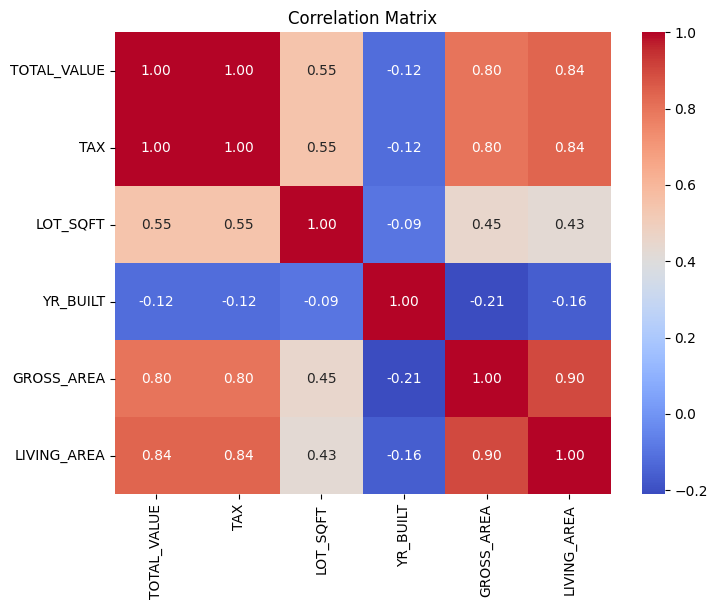

In [42]:
# prompt: df_filtered DataFrame 사용: 'TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA', 'LIVING_AREA' 컬럼에 대해 상관관계와 heatmap 그릴 수 있는 코드를 제공해주세요

# 필요한 라이브러리 import
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 행렬 계산
correlation_matrix = df_filtered[['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA', 'LIVING_AREA']].corr()

# Heatmap 생성
plt.figure(figsize=(8, 6))  # Heatmap 크기 조정
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # annot=True로 상관계수 표시
plt.title('Correlation Matrix')
plt.show()


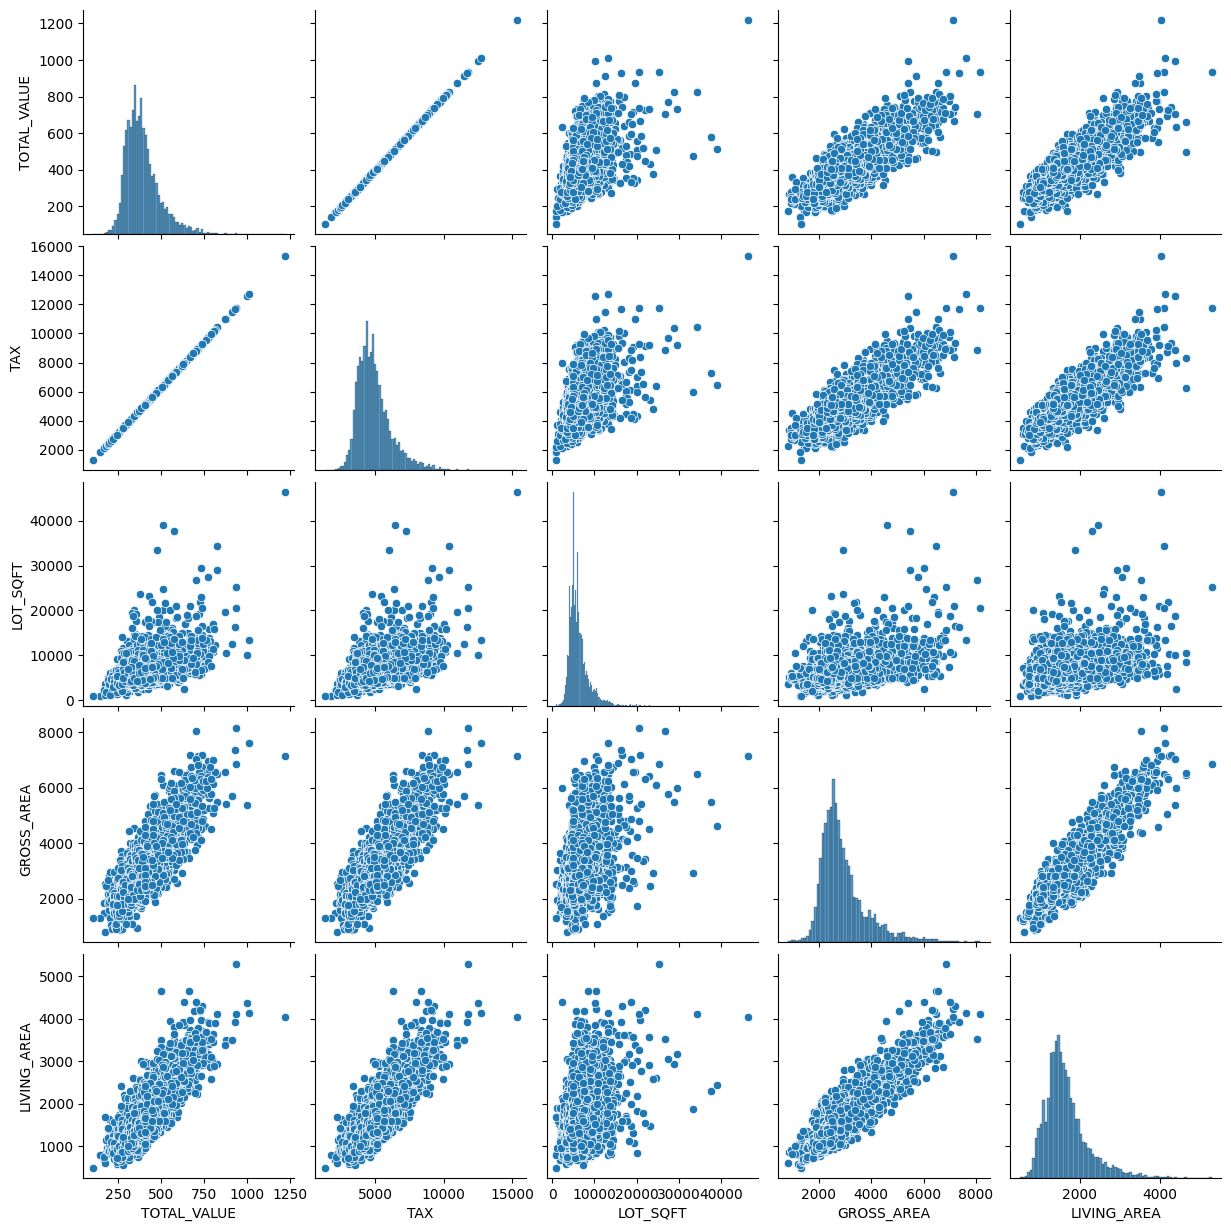

In [44]:
# prompt: df_filtered 데이터셋에서 'TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'GROSS_AREA', 'LIVING_AREA 컬럼에 대해서 산점도를 그리는 코드를 제공해주세요

import matplotlib.pyplot as plt
sns.pairplot(df_filtered[['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'GROSS_AREA', 'LIVING_AREA']])
plt.show()

In [48]:
# prompt: df_filtered 데이터셋에서  'LOT_SQFT', 'GROSS_AREA', 'LIVING_AREA 컬럼에 대해서 주성분 분석을 할 수 있는 코드를 제공해주세요

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# 주성분 분석을 위한 데이터 선택
X = df_filtered[['LOT_SQFT', 'GROSS_AREA', 'LIVING_AREA']]

# 데이터 표준화
x = StandardScaler().fit_transform(X)

# PCA 객체 생성 및 주성분 분석 수행 (주성분 개수를 2개로 설정)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

# 주성분 데이터를 DataFrame으로 변환
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# 결과 출력
print(principalDf)
print(pca.explained_variance_ratio_)


      principal component 1  principal component 2
0                 -0.077036               1.588887
1                  0.555053              -0.158698
2                 -0.575678               0.803297
3                  3.887561               1.181466
4                 -0.868469              -0.098895
...                     ...                    ...
5796              -0.087971               0.239264
5797              -0.209548               1.422493
5798              -0.141913               0.448935
5799              -1.320787               0.933032
5800              -0.171037               0.554367

[5801 rows x 2 columns]
[0.7382917  0.22840657]


In [54]:
pca.

array([113.35118198,  63.04727965])

In [49]:
principalDf

,principal component 1,principal component 2
0,-0.077036,1.588887
1,0.555053,-0.158698
2,-0.575678,0.803297
3,3.887561,1.181466
4,-0.868469,-0.098895
...,...,...
5796,-0.087971,0.239264
5797,-0.209548,1.422493
5798,-0.141913,0.448935
5799,-1.320787,0.933032


In [50]:
# prompt: principalDf 데이터셋과 df_filtered 데이터셋을 merge하고 난후 컬럼명을 list를 볼 수 있는 코드를 제공해주세요

import pandas as pd
# principalDf와 df_filtered 데이터셋을 merge
merged_df = pd.concat([df_filtered, principalDf], axis=1)

# 컬럼명 list 출력
print(list(merged_df.columns))


['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA', 'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH', 'KITCHEN', 'FIREPLACE', 'REMODEL', 'YR_BUILT_Category', 'YR_BUILT_Encoded', 'REMODEL_Unknown', 'REMODEL_Recent', 'REMODEL_Old', 'principal component 1', 'principal component 2']


In [51]:
merged_df

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,...,KITCHEN,FIREPLACE,REMODEL,YR_BUILT_Category,YR_BUILT_Encoded,REMODEL_Unknown,REMODEL_Recent,REMODEL_Old,principal component 1,principal component 2
0,344.2,4330.0,9965.0,1880.0,2436.0,1352.0,2.0,6.0,3.0,1.0,...,1.0,0.0,Unknown,Older,2,1.0,0.0,0.0,-0.077036,1.588887
1,412.6,5190.0,6590.0,1945.0,3108.0,1976.0,2.0,10.0,4.0,2.0,...,1.0,0.0,Recent,Newer,3,0.0,1.0,0.0,0.555053,-0.158698
2,330.1,4152.0,7500.0,1890.0,2294.0,1371.0,2.0,8.0,4.0,1.0,...,1.0,0.0,Unknown,Older,2,1.0,0.0,0.0,-0.575678,0.803297
3,498.6,6272.0,13773.0,1957.0,5032.0,2608.0,1.0,9.0,5.0,1.0,...,1.0,1.0,Unknown,Newer,3,1.0,0.0,0.0,3.887561,1.181466
4,331.5,4170.0,5000.0,1910.0,2370.0,1438.0,2.0,7.0,3.0,2.0,...,1.0,0.0,Unknown,Newer,3,1.0,0.0,0.0,-0.868469,-0.098895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5798,407.9,5131.0,9408.0,1950.0,2414.0,1333.0,2.0,6.0,3.0,1.0,...,1.0,1.0,Unknown,Newer,3,1.0,0.0,0.0,-0.141913,0.448935
5799,406.5,5113.0,7198.0,1987.0,2480.0,1674.0,2.0,7.0,3.0,1.0,...,1.0,1.0,Unknown,Newest,4,1.0,0.0,0.0,-1.320787,0.933032
5800,308.7,3883.0,6890.0,1946.0,2000.0,1000.0,1.0,5.0,2.0,1.0,...,1.0,0.0,Unknown,Newer,3,1.0,0.0,0.0,-0.171037,0.554367
5801,447.6,5630.0,7406.0,1950.0,2510.0,1600.0,2.0,7.0,3.0,1.0,...,1.0,1.0,Unknown,Newer,3,1.0,0.0,0.0,NaN,NaN


In [57]:
# prompt: 'principal component 1', 'principal component 2' 이 두개의 컬럼명을 각각 'PCA1', 'PCA2'로 변환할 수 있는 코드를 제공해주세요

merged_df = merged_df.rename(columns={'principal component 1': 'PCA1', 'principal component 2': 'PCA2'})
merged_df

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,...,KITCHEN,FIREPLACE,REMODEL,YR_BUILT_Category,YR_BUILT_Encoded,REMODEL_Unknown,REMODEL_Recent,REMODEL_Old,PCA1,PCA2
0,344.2,4330.0,9965.0,1880.0,2436.0,1352.0,2.0,6.0,3.0,1.0,...,1.0,0.0,Unknown,Older,2,1.0,0.0,0.0,-0.077036,1.588887
1,412.6,5190.0,6590.0,1945.0,3108.0,1976.0,2.0,10.0,4.0,2.0,...,1.0,0.0,Recent,Newer,3,0.0,1.0,0.0,0.555053,-0.158698
2,330.1,4152.0,7500.0,1890.0,2294.0,1371.0,2.0,8.0,4.0,1.0,...,1.0,0.0,Unknown,Older,2,1.0,0.0,0.0,-0.575678,0.803297
3,498.6,6272.0,13773.0,1957.0,5032.0,2608.0,1.0,9.0,5.0,1.0,...,1.0,1.0,Unknown,Newer,3,1.0,0.0,0.0,3.887561,1.181466
4,331.5,4170.0,5000.0,1910.0,2370.0,1438.0,2.0,7.0,3.0,2.0,...,1.0,0.0,Unknown,Newer,3,1.0,0.0,0.0,-0.868469,-0.098895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5798,407.9,5131.0,9408.0,1950.0,2414.0,1333.0,2.0,6.0,3.0,1.0,...,1.0,1.0,Unknown,Newer,3,1.0,0.0,0.0,-0.141913,0.448935
5799,406.5,5113.0,7198.0,1987.0,2480.0,1674.0,2.0,7.0,3.0,1.0,...,1.0,1.0,Unknown,Newest,4,1.0,0.0,0.0,-1.320787,0.933032
5800,308.7,3883.0,6890.0,1946.0,2000.0,1000.0,1.0,5.0,2.0,1.0,...,1.0,0.0,Unknown,Newer,3,1.0,0.0,0.0,-0.171037,0.554367
5801,447.6,5630.0,7406.0,1950.0,2510.0,1600.0,2.0,7.0,3.0,1.0,...,1.0,1.0,Unknown,Newer,3,1.0,0.0,0.0,NaN,NaN


In [58]:
# prompt: 'TOTAL_VALUE', 'PCA1','PCA2', 'LOT_SQFT', 'GROSS_AREA', 'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH', 'KITCHEN', 'FIREPLACE', 'YR_BUILT_Encoded', 'REMODEL_Unknown', 'REMODEL_Recent', 'REMODEL_Old' 순으로 배열하되 해당컬럼만 선택하여 df_final 이름으로 새로운 데이터셋을 생성하는 코드를 제공해주세요

selected_columns = ['TOTAL_VALUE', 'PCA1', 'PCA2', 'LOT_SQFT', 'GROSS_AREA', 'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH', 'KITCHEN', 'FIREPLACE', 'YR_BUILT_Encoded', 'REMODEL_Unknown', 'REMODEL_Recent', 'REMODEL_Old']
df_final = merged_df[selected_columns]


In [59]:
df_final

,TOTAL_VALUE,PCA1,PCA2,LOT_SQFT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,YR_BUILT_Encoded,REMODEL_Unknown,REMODEL_Recent,REMODEL_Old
0,344.2,-0.077036,1.588887,9965.0,2436.0,1352.0,2.0,6.0,3.0,1.0,1.0,1.0,0.0,2,1.0,0.0,0.0
1,412.6,0.555053,-0.158698,6590.0,3108.0,1976.0,2.0,10.0,4.0,2.0,1.0,1.0,0.0,3,0.0,1.0,0.0
2,330.1,-0.575678,0.803297,7500.0,2294.0,1371.0,2.0,8.0,4.0,1.0,1.0,1.0,0.0,2,1.0,0.0,0.0
3,498.6,3.887561,1.181466,13773.0,5032.0,2608.0,1.0,9.0,5.0,1.0,1.0,1.0,1.0,3,1.0,0.0,0.0
4,331.5,-0.868469,-0.098895,5000.0,2370.0,1438.0,2.0,7.0,3.0,2.0,0.0,1.0,0.0,3,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5798,407.9,-0.141913,0.448935,9408.0,2414.0,1333.0,2.0,6.0,3.0,1.0,1.0,1.0,1.0,3,1.0,0.0,0.0
5799,406.5,-1.320787,0.933032,7198.0,2480.0,1674.0,2.0,7.0,3.0,1.0,1.0,1.0,1.0,4,1.0,0.0,0.0
5800,308.7,-0.171037,0.554367,6890.0,2000.0,1000.0,1.0,5.0,2.0,1.0,0.0,1.0,0.0,3,1.0,0.0,0.0
5801,447.6,NaN,NaN,7406.0,2510.0,1600.0,2.0,7.0,3.0,1.0,1.0,1.0,1.0,3,1.0,0.0,0.0


In [60]:
# prompt: df_final DataFrame 사용: train, validation, test 데이터셋으로 구분하는 코드를 제공해주세요

from sklearn.model_selection import train_test_split

# 데이터를 train, validation, test set으로 분할합니다.
# 먼저 train set과 test set으로 분할합니다. (예: 80% train, 20% test)
train_df, test_df = train_test_split(df_final, test_size=0.2, random_state=42)

# 그 다음, train set을 train set과 validation set으로 분할합니다. (예: 80% train, 20% validation)
train_df, validation_df = train_test_split(train_df, test_size=0.2, random_state=42)

# 결과 확인 (행 수)
print(f"Train set size: {len(train_df)}")
print(f"Validation set size: {len(validation_df)}")
print(f"Test set size: {len(test_df)}")



Train set size: 3712
Validation set size: 929
Test set size: 1161


In [62]:
train_df

,TOTAL_VALUE,PCA1,PCA2,LOT_SQFT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,YR_BUILT_Encoded,REMODEL_Unknown,REMODEL_Recent,REMODEL_Old
4977,412.6,0.238865,0.273307,5876.0,3181.0,1971.0,2.0,8.0,4.0,1.0,1.0,1.0,1.0,3,1.0,0.0,0.0
5760,337.7,-0.577137,-0.246517,5000.0,2146.0,1076.0,2.0,6.0,3.0,1.0,1.0,1.0,1.0,3,1.0,0.0,0.0
3273,368.2,-0.103850,-0.516104,7100.0,2630.0,1466.0,2.0,8.0,3.0,1.0,1.0,1.0,0.0,3,0.0,0.0,1.0
1252,291.7,-1.612641,-0.646382,2806.0,2004.0,1344.0,2.0,5.0,3.0,1.0,1.0,1.0,1.0,2,0.0,0.0,1.0
3030,396.6,1.923083,-0.943695,5500.0,3551.0,1918.0,2.0,7.0,4.0,1.0,1.0,1.0,1.0,3,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4497,469.3,0.385730,-0.527438,14029.0,2341.0,1350.0,2.0,6.0,3.0,1.0,1.0,1.0,0.0,3,1.0,0.0,0.0
3122,418.1,-0.486304,-0.716193,7591.0,3064.0,1959.0,2.5,7.0,4.0,1.0,1.0,1.0,1.0,2,1.0,0.0,0.0
520,285.2,-0.327682,0.998124,8245.0,2569.0,1306.0,1.5,7.0,3.0,2.0,0.0,1.0,1.0,3,0.0,1.0,0.0
1606,292.5,1.640055,-0.105659,4422.0,2725.0,1291.0,1.5,6.0,3.0,1.0,1.0,1.0,0.0,2,0.0,0.0,1.0
